In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
train = pd.read_csv('train.csv', index_col = 'ID')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

C:\Users\tarci\AppData\Local\Temp\ipykernel_32516\2283007097.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv', index_col = 'ID')


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79425 entries, 1 to 79425
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   submission_date        79425 non-null  object 
 1   reviewer_id            79425 non-null  object 
 2   reviewer_birth_year    75874 non-null  float64
 3   reviewer_gender        76941 non-null  object 
 4   reviewer_state         77023 non-null  object 
 5   product_id             79425 non-null  object 
 6   product_name           79373 non-null  object 
 7   product_brand          24646 non-null  object 
 8   site_category_lv1      79421 non-null  object 
 9   site_category_lv2      77007 non-null  object 
 10  review_title           79248 non-null  object 
 11  review_text            77458 non-null  object 
 12  recommend_to_a_friend  79414 non-null  object 
 13  rating                 79425 non-null  int64  
dtypes: float64(1), int64(1), object(12)
memory usage: 9.1+

In [38]:
train_review = train[['review_title','review_text','recommend_to_a_friend','rating']]

### Exploração inicial

In [4]:
train_trated = train.drop(columns=['reviewer_id'])
train_trated['age_reviewer'] = datetime.datetime.now().year - train_trated['reviewer_birth_year']
train_trated = train_trated.drop(columns=['reviewer_birth_year'])

# Formatos date são, por padrão, AAAA-MM-DD HH:MM:SS.ssssss
# Tem que transformar o resultado da subtração em formato numérico para fazer histograma
train_trated['days_submission'] = datetime.date.today() - pd.to_datetime(train_trated['submission_date']).dt.date
train_trated['days_submission'] = train_trated['days_submission'].dt.days
train_trated['days_submission'] = train_trated['days_submission']/365
train_trated = train_trated.drop(columns=['submission_date'])

products = train_trated[['product_id','product_name']]
# Transformando a coluna em inteira para conseguir acessar só com número
products = products.set_index('product_id')
products = products['product_name'].to_dict()
train_trated = train_trated.drop(columns=['product_id'])

In [37]:
# train_trated
# train_trated['product_brand'].unique()
train_trated['recommend_to_a_friend'].unique()

array(['Yes', 'No', nan], dtype=object)

(array([ 3584., 12540., 17180., 15437.,  9054.,  8406.,  5437.,  2915.,
          896.,   248.]),
 array([21. , 27.8, 34.6, 41.4, 48.2, 55. , 61.8, 68.6, 75.4, 82.2, 89. ]),
 <BarContainer object of 10 artists>)

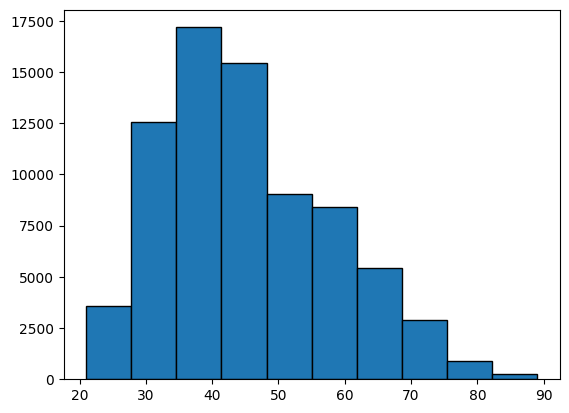

In [6]:
valid_years = (train_trated['age_reviewer'] < 90) & (train_trated['age_reviewer'] > 20)
plt.hist(train_trated[valid_years]['age_reviewer'], bins=10, edgecolor='black')  # Ajuste o número de 'bins' conforme necessário

(array([ 6372.,  8165.,  8141.,  8880.,  8308.,  8062.,  5189.,  2640.,
         8506., 11434.]),
 array([5.40547945, 5.44657534, 5.48767123, 5.52876712, 5.56986301,
        5.6109589 , 5.65205479, 5.69315068, 5.73424658, 5.77534247,
        5.81643836]),
 <BarContainer object of 10 artists>)

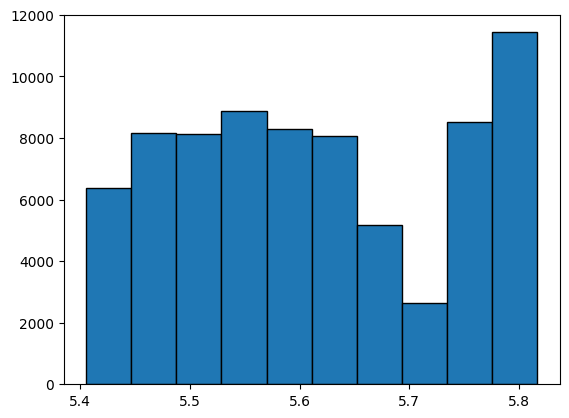

In [7]:
valid_days = True
plt.hist(train_trated[valid_years]['days_submission'], bins=10, edgecolor='black')  # Ajuste o número de 'bins' conforme necessário

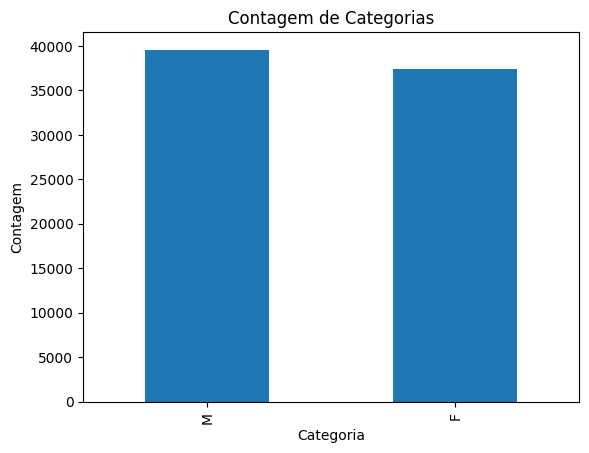

In [8]:
# Conta a frequência de cada categoria
contagem_categorias = train_trated['reviewer_gender'].value_counts()

# Cria um gráfico de barras para visualizar a contagem
contagem_categorias.plot(kind='bar')

# Configurações do gráfico
plt.title('Contagem de Categorias')
plt.xlabel('Categoria')
plt.ylabel('Contagem')

# Exibe o gráfico
plt.show()

In [20]:
# Conta a frequência de cada categoria
contagem_categorias = train_trated['product_name'].value_counts()
valid_values = contagem_categorias > 100
print(f"Quantos são válidos: {len(contagem_categorias[valid_values])}")

Quantos são válidos: 54


In [31]:
# Conta a frequência de cada categoria
contagem_categorias = train_trated['site_category_lv1'].value_counts()
contagem_categorias

Celulares e Smartphones           12501
Eletroportáteis                    7051
Beleza e Perfumaria                5346
Utilidades Domésticas              4944
TV e Home Theater                  4609
Informática e Acessórios           4461
Móveis                             4376
Brinquedos                         2812
Casa e Construção                  2641
Informática                        2580
Livros                             2499
Automotivo                         2290
Eletrodomésticos                   2290
Games                              2093
Bebês                              1818
Cama, Mesa e Banho                 1766
Esporte e Lazer                    1746
Saúde                              1699
Moda                               1539
Ferramentas e Jardim               1042
Áudio                               924
Decoração                           914
Relógios                            904
Pet Shop                            789
Suplementos e Vitaminas             730


In [32]:
# Conta a frequência de cada categoria
contagem_categorias = train_trated['site_category_lv2'].value_counts()
contagem_categorias

Smartphone                 10586
TV                          3759
Cabelo                      1540
Notebook                    1503
Acessórios para Celular     1383
                           ...  
Religioso / Gospel             1
Acabamentos para Motos         1
Sem Lactose                    1
Filtro de Barro                1
Literatura Infantil            1
Name: site_category_lv2, Length: 678, dtype: int64